In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-appointment-power-bi-project/Appointment Scheduling Cleaned Data.csv


In [2]:
import pandas as pd

df=pd.read_csv("/kaggle/input/healthcare-appointment-power-bi-project/Appointment Scheduling Cleaned Data.csv")

df.head()

,Requesting date,Appointment date,Client ID,Provider Role,First Name,Last Name,Full Name,Waiting Time
0,9/20/23 12:18 PM,9/21/23 12:45 PM,1,Nurse,Aayan,Johnson,Aayan Johnson,"31 days, 0 hours"
1,9/20/23 12:19 PM,9/29/23 10:47 AM,2,Nurse,Minnie,Pratt,Minnie Pratt,"7 days, 22 hours"
2,9/20/23 2:56 PM,10/23/23 11:50 AM,3,Nurse,Bianca,English,Bianca English,"31 days, 20 hours"
3,9/20/23 2:56 PM,10/16/23 3:04 PM,4,Nurse,Rosalind,Love,Rosalind Love,"25 days, 0 hours"
4,9/20/23 2:56 PM,10/16/23 3:04 PM,5,Nurse,Zaara,Lynch,Zaara Lynch,"25 days, 0 hours"


**Objective -- Analyze how waiting times impact follow-up appointment frequency and provider workload**


In [3]:
# Extract days form the Waiting time Column

df['Waiting Days']= df['Waiting Time'].str.split('days').str[0].astype(float)

print(df[['Waiting Time','Waiting Days']].head())

df.head()


        Waiting Time  Waiting Days
0   31 days, 0 hours          31.0
1   7 days, 22 hours           7.0
2  31 days, 20 hours          31.0
3   25 days, 0 hours          25.0
4   25 days, 0 hours          25.0


,Requesting date,Appointment date,Client ID,Provider Role,First Name,Last Name,Full Name,Waiting Time,Waiting Days
0,9/20/23 12:18 PM,9/21/23 12:45 PM,1,Nurse,Aayan,Johnson,Aayan Johnson,"31 days, 0 hours",31.0
1,9/20/23 12:19 PM,9/29/23 10:47 AM,2,Nurse,Minnie,Pratt,Minnie Pratt,"7 days, 22 hours",7.0
2,9/20/23 2:56 PM,10/23/23 11:50 AM,3,Nurse,Bianca,English,Bianca English,"31 days, 20 hours",31.0
3,9/20/23 2:56 PM,10/16/23 3:04 PM,4,Nurse,Rosalind,Love,Rosalind Love,"25 days, 0 hours",25.0
4,9/20/23 2:56 PM,10/16/23 3:04 PM,5,Nurse,Zaara,Lynch,Zaara Lynch,"25 days, 0 hours",25.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Requesting date   99 non-null     object 
 1   Appointment date  99 non-null     object 
 2   Client ID         99 non-null     object 
 3   Provider Role     99 non-null     object 
 4   First Name        99 non-null     object 
 5   Last Name         99 non-null     object 
 6   Full Name         99 non-null     object 
 7   Waiting Time      99 non-null     object 
 8   Waiting Days      99 non-null     float64
dtypes: float64(1), object(8)
memory usage: 7.1+ KB


,Waiting Days
count,99.000000
mean,10.040404
std,9.358963
min,1.000000
25%,3.000000
50%,6.000000
75%,13.000000
max,31.000000


In [5]:
df['Provider Role'].unique()

array(['Nurse', 'Psychologist', 'MD'], dtype=object)

**Avg wait time by Provider Role**

In [6]:
# Avg wait time by provider role

avg_wait_by_role = df.groupby('Provider Role')['Waiting Days'].mean().round(1)

print("Average Wait Days by Role :\n",avg_wait_by_role)

Average Wait Days by Role :
 Provider Role
MD               9.3
Nurse           10.4
Psychologist    12.6
Name: Waiting Days, dtype: float64


**Appointment frequency analysis**

In [7]:
# Count Appointment per patient(Client Id)

Appointment_freq = df['Client ID'].value_counts().reset_index()
Appointment_freq.columns=['Client ID','AppointmentCount']

print("\nPatients by appointment frequency:")
print(Appointment_freq)

# Summary Stats
print(Appointment_freq['AppointmentCount'].describe())


Patients by appointment frequency:
   Client ID  AppointmentCount
0          1                 1
1         75                 1
2         73                 1
3         72                 1
4         71                 1
..       ...               ...
94        31                 1
95        30                 1
96        29                 1
97        28                 1
98        99                 1

[99 rows x 2 columns]
count    99.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: AppointmentCount, dtype: float64


**Busiest Days for Appointment**

In [8]:
# Extract day of week from Appointment date
df['AppointmentDay']=pd.to_datetime(df['Appointment date'])

df['DayOfWeek']=df['AppointmentDay'].dt.day_name()

# Count appointments by weekday
appointments_by_day = df['DayOfWeek'].value_counts()
print("\nAppointments by day:\n", appointments_by_day)


Appointments by day:
 DayOfWeek
Monday       23
Tuesday      18
Wednesday    16
Thursday     12
Friday       11
Saturday     11
Sunday        8
Name: count, dtype: int64


/tmp/ipykernel_13/6432557.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['AppointmentDay']=pd.to_datetime(df['Appointment date'])


**Appointment Distribution by Weekday**

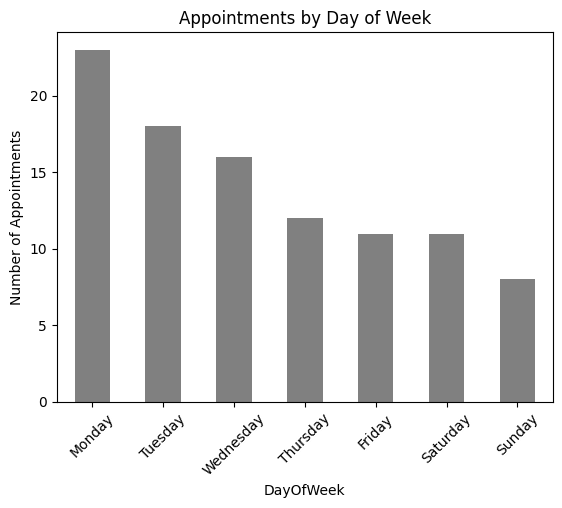

In [9]:
import matplotlib.pyplot as plt

appointments_by_day.plot(kind='bar', color='grey')
plt.title("Appointments by Day of Week")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.show()

**Scatter Plot: Wait Time vs. Appointment Frequency**

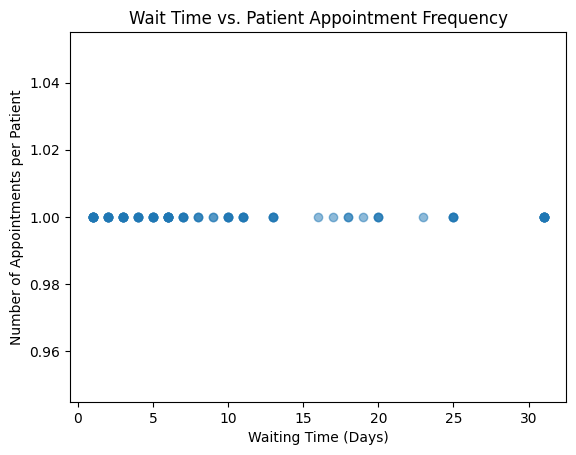

In [10]:
# Merge appointment frequency data
df_with_freq = df.merge(Appointment_freq, on='Client ID')

plt.scatter(df_with_freq['Waiting Days'], df_with_freq['AppointmentCount'], alpha=0.5)
plt.title("Wait Time vs. Patient Appointment Frequency")
plt.xlabel("Waiting Time (Days)")
plt.ylabel("Number of Appointments per Patient")
plt.show()

**How long do patients typically wait?**

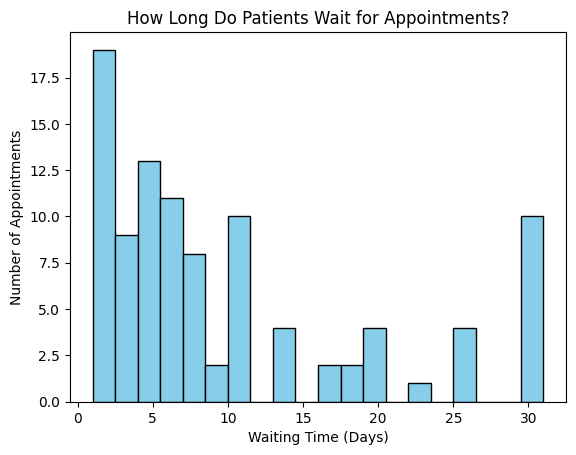

In [11]:
plt.hist(df['Waiting Days'], bins=20, color='skyblue', edgecolor='black')
plt.title("How Long Do Patients Wait for Appointments?")
plt.xlabel("Waiting Time (Days)")
plt.ylabel("Number of Appointments")
plt.show()

Business Insight:

* 
Observation: Most appointments occur with a waiting time of fewer than 10 days, particularly peaking around 0-5 days. There’s a noticeable drop beyond 10 days, with a small increase at 30 days.

* 
Insight: The majority of patients are scheduled efficiently within a short waiting period. However, the spike at 30 days suggests specific scheduling patterns or constraints (e.g., recurring appointments).


Actionable Recommendations:

1. 
Optimize Scheduling: Ensure availability within 0-10 day ranges to maintain patient satisfaction.

2. 
Address 30-Day Spike: Investigate why appointments cluster at 30 days. If due to routine follow-ups, consider confirming them or offering earlier slots if possible.

3. 
Use Priority Reminders: For appointments over 10 days, use reminder strategies to minimize potential no-shows, focusing efforts on ensuring these appointments are not forgotten or skipped.> 

**Which provider roles have the longest waits?**

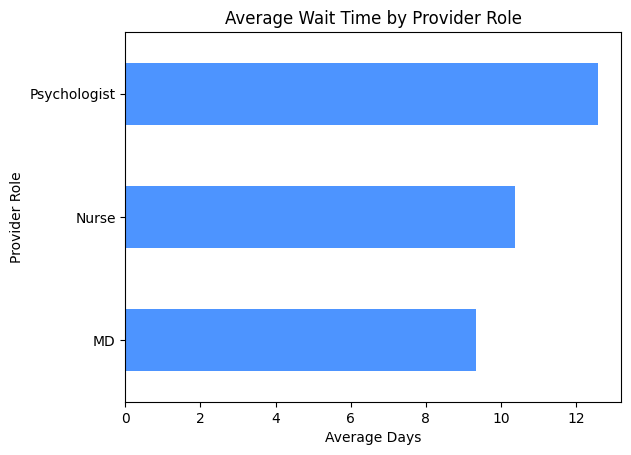

In [12]:
# Calculate average waiting time per provider role
provider_wait = df.groupby('Provider Role')['Waiting Days'].mean().sort_values()

# Plot
provider_wait.plot(kind='barh', color='#4d94ff')
plt.title("Average Wait Time by Provider Role")
plt.xlabel("Average Days")
plt.show()

Business Insight: Provider Role Wait Times
"Psychologists have the longest average wait time, reaching over 12 days, which may indicate limited availability or high demand for mental health services. Meanwhile, appointments with Medical Doctors (MDs) and nurses average closer to 8-10 days, suggesting more manageable or different demand patterns."

Actionable Recommendations:

1. 
Expand Psychological Services: Consider increasing the number of psychology appointments available or hiring additional psychologists to meet demand and reduce wait times.

2. 
Resource Allocation: Re-evaluate current scheduling practices to optimize the distribution of appointment slots, potentially freeing up capacity for high-demand services.

3. 
Patient Communication: Implement targeted communication strategies for patients awaiting psychological services to manage expectations and reduce potential no-show rates.

**Are patients with more appointments willing to wait longer?**

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


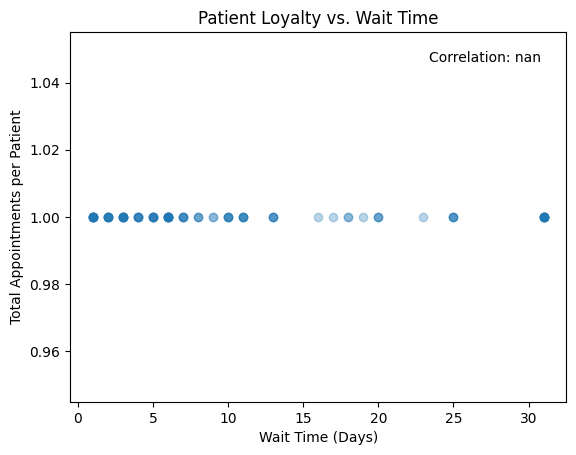

In [13]:
# Calculate appointments per patient
appointment_counts = df['Client ID'].value_counts()

# Merge with original data
df['TotalAppointments'] = df['Client ID'].map(appointment_counts)

# Scatter plot
plt.scatter(df['Waiting Days'], df['TotalAppointments'], alpha=0.3)
plt.title("Patient Loyalty vs. Wait Time")
plt.xlabel("Wait Time (Days)")
plt.ylabel("Total Appointments per Patient")

# Add correlation value
corr = df['Waiting Days'].corr(df['TotalAppointments'])
plt.text(0.95, 0.95, f"Correlation: {corr:.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.show()